# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units= "metric"    
query_url = f"{url}appid={weather_api_key}&units={units}&q="
example=cities[0]
exa_url = query_url+example
exa_weather = requests.get(city_url).json()
exa_weather

{'coord': {'lon': 70.2167, 'lat': -49.35},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 2.15,
  'feels_like': -4.85,
  'temp_min': 2.15,
  'temp_max': 2.15,
  'pressure': 999,
  'humidity': 65,
  'sea_level': 999,
  'grnd_level': 998},
 'visibility': 10000,
 'wind': {'speed': 14.24, 'deg': 266, 'gust': 16.45},
 'clouds': {'all': 50},
 'dt': 1698023784,
 'sys': {'country': 'TF', 'sunrise': 1698019476, 'sunset': 1698069732},
 'timezone': 18000,
 'id': 1546102,
 'name': 'Port-aux-Français',
 'cod': 200}

In [23]:
# Set the API base URL
url = https://api.openweathermap.org/data/2.5/weather?
units= "metric"    
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Object `weather` not found.
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | christchurch
Processing Record 4 of Set 1 | cabo san lucas
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | suihua
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | broome
Processing Record 12 of Set 1 | nar'yan-mar
Processing Record 13 of Set 1 | grinnell
Processing Record 14 of Set 1 | okha
Processing Record 15 of Set 1 | tazovsky
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | portland
Processing Record 20 of Set 1 | tolanaro
Processing Record 21

Processing Record 36 of Set 4 | talnakh
Processing Record 37 of Set 4 | gornopravdinsk
Processing Record 38 of Set 4 | carutapera
Processing Record 39 of Set 4 | sona
Processing Record 40 of Set 4 | sao gabriel da cachoeira
Processing Record 41 of Set 4 | serra
Processing Record 42 of Set 4 | utrik
Processing Record 43 of Set 4 | kapit
Processing Record 44 of Set 4 | antsirabe afovoany
City not found. Skipping...
Processing Record 45 of Set 4 | banda aceh
Processing Record 46 of Set 4 | port elizabeth
Processing Record 47 of Set 4 | laguna
Processing Record 48 of Set 4 | quellon
Processing Record 49 of Set 4 | ilulissat
Processing Record 0 of Set 5 | ndjole
Processing Record 1 of Set 5 | jianshui
Processing Record 2 of Set 5 | kadipur
Processing Record 3 of Set 5 | altai
Processing Record 4 of Set 5 | luderitz
Processing Record 5 of Set 5 | ochakiv
Processing Record 6 of Set 5 | elk
Processing Record 7 of Set 5 | sansanne-mango
Processing Record 8 of Set 5 | changling
Processing Record

Processing Record 28 of Set 8 | sao jose da coroa grande
Processing Record 29 of Set 8 | fortuna
Processing Record 30 of Set 8 | malanje
Processing Record 31 of Set 8 | guneysu
Processing Record 32 of Set 8 | manjeshvar
Processing Record 33 of Set 8 | polyarnyy
Processing Record 34 of Set 8 | cooper's town
Processing Record 35 of Set 8 | mahdia
Processing Record 36 of Set 8 | obanazawa
Processing Record 37 of Set 8 | cayon
Processing Record 38 of Set 8 | alliance
Processing Record 39 of Set 8 | susuman
Processing Record 40 of Set 8 | tazacorte
Processing Record 41 of Set 8 | konarka
Processing Record 42 of Set 8 | morehead city
Processing Record 43 of Set 8 | northam
Processing Record 44 of Set 8 | uglegorsk
Processing Record 45 of Set 8 | kununurra
Processing Record 46 of Set 8 | eureka
Processing Record 47 of Set 8 | khor
Processing Record 48 of Set 8 | piacabucu
Processing Record 49 of Set 8 | broken hill
Processing Record 0 of Set 9 | hargeysa
Processing Record 1 of Set 9 | vidyaye

Processing Record 17 of Set 12 | kebili
Processing Record 18 of Set 12 | tawau
Processing Record 19 of Set 12 | klaksvik
Processing Record 20 of Set 12 | sosnovo-ozerskoye
Processing Record 21 of Set 12 | andergrove
Processing Record 22 of Set 12 | seeb
Processing Record 23 of Set 12 | bougouni
Processing Record 24 of Set 12 | crane
Processing Record 25 of Set 12 | waiuku
Processing Record 26 of Set 12 | jayapura
Processing Record 27 of Set 12 | dame-marie
Processing Record 28 of Set 12 | watsa
Processing Record 29 of Set 12 | malangali
Processing Record 30 of Set 12 | novonikolayevskiy
Processing Record 31 of Set 12 | tsiombe
Processing Record 32 of Set 12 | satupa'itea
City not found. Skipping...
Processing Record 33 of Set 12 | kawerau
Processing Record 34 of Set 12 | oltinko'l
Processing Record 35 of Set 12 | nizhniy lomov
Processing Record 36 of Set 12 | datca
Processing Record 37 of Set 12 | boguchany
Processing Record 38 of Set 12 | dalbandin
Processing Record 39 of Set 12 | gil

In [101]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [102]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.11,67,83,13.37,TF,1698030823
1,puerto ayora,-0.7393,-90.3518,23.24,84,94,4.93,EC,1698031130
2,christchurch,-43.5333,172.6333,18.08,65,38,8.75,NZ,1698031131
3,cabo san lucas,22.8909,-109.9124,27.09,86,75,4.12,MX,1698031132
4,edinburgh of the seven seas,-37.0676,-12.3116,12.44,73,89,3.47,SH,1698031134


In [103]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [104]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.11,67,83,13.37,TF,1698030823
1,puerto ayora,-0.7393,-90.3518,23.24,84,94,4.93,EC,1698031130
2,christchurch,-43.5333,172.6333,18.08,65,38,8.75,NZ,1698031131
3,cabo san lucas,22.8909,-109.9124,27.09,86,75,4.12,MX,1698031132
4,edinburgh of the seven seas,-37.0676,-12.3116,12.44,73,89,3.47,SH,1698031134


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

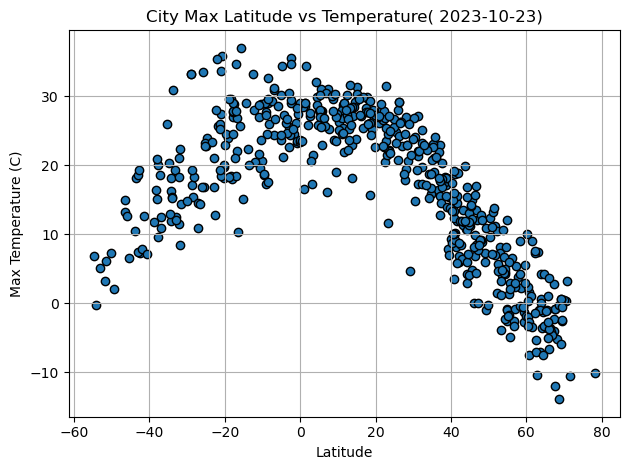

In [105]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs Temperature( 2023-10-23)")
plt.grid(True)
plt.tight_layout() 
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

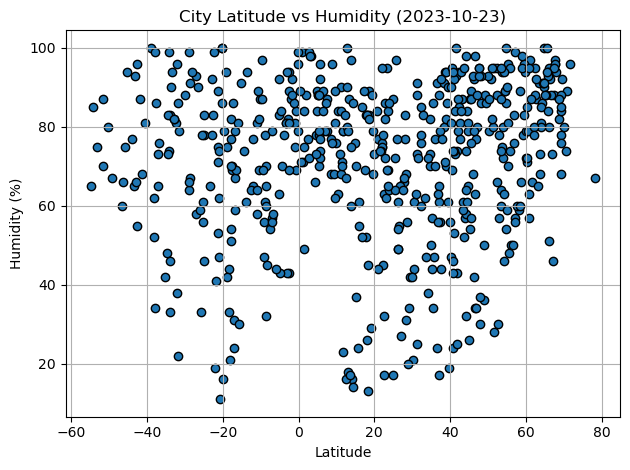

In [106]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2023-10-23)")
plt.grid(True)
plt.tight_layout() 
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

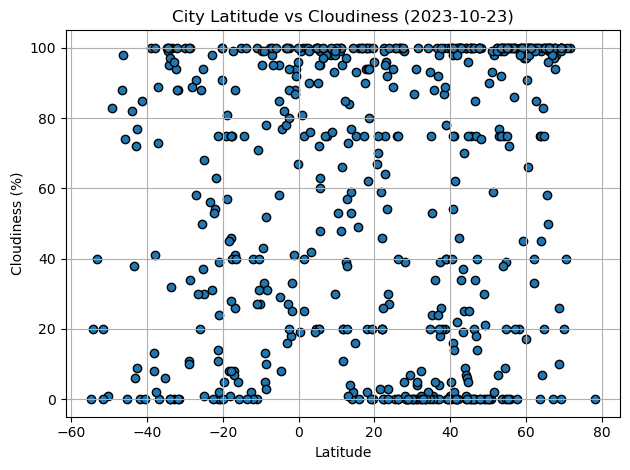

In [107]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2023-10-23)")
plt.grid(True)
plt.tight_layout() 
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

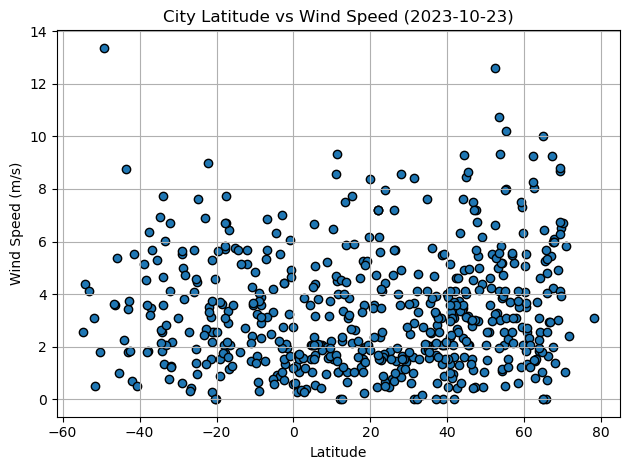

In [108]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (2023-10-23)")
plt.grid(True)
plt.tight_layout() 
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [109]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, text_coordinates=(0,0)):
    (slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
    regress_values=x_values*slope+intercept
    line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
    # Create a scatter plot of the x and y values
    plt.scatter(x_values, y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope
    plt.plot(x_values, regress_values, "r-")
    # Annotate the text for the line equation and add its coordinates
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
#     plt.title(title)
#     plt.xlabel(x_label)
#     plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")
    plt.show()


In [110]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,cabo san lucas,22.8909,-109.9124,27.09,86,75,4.12,MX,1698031132
5,whitehorse,60.7161,-135.0538,-7.57,57,100,2.57,CA,1698031111
6,suihua,46.6406,126.9969,13.51,34,0,7.49,CN,1698031136
7,college,64.8569,-147.8028,-3.29,90,100,0.00,US,1698030863
10,broome,42.2506,-75.8330,5.95,94,100,4.63,US,1698031142


In [111]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]< 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.11,67,83,13.37,TF,1698030823
1,puerto ayora,-0.7393,-90.3518,23.24,84,94,4.93,EC,1698031130
2,christchurch,-43.5333,172.6333,18.08,65,38,8.75,NZ,1698031131
4,edinburgh of the seven seas,-37.0676,-12.3116,12.44,73,89,3.47,SH,1698031134
8,puerto natales,-51.7236,-72.4875,3.25,87,20,3.09,CL,1698031139


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.9092826172245309


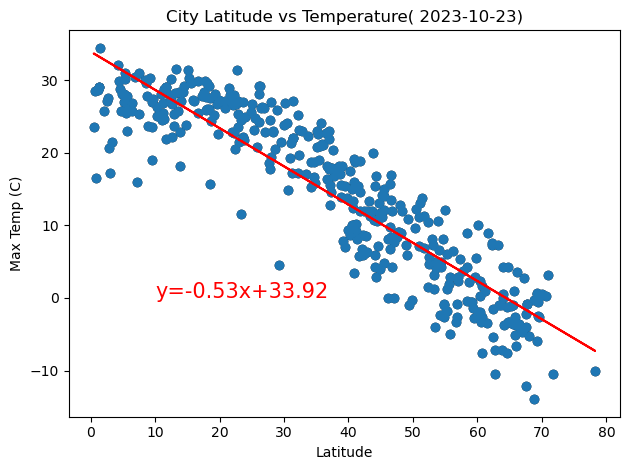

In [112]:
# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],edgecolors='black',color='blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("City Latitude vs Temperature( 2023-10-23)")
plt.tight_layout() 
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],(10,0))

# Show plot
plt.show()


The r-value is: 0.7089578659829752


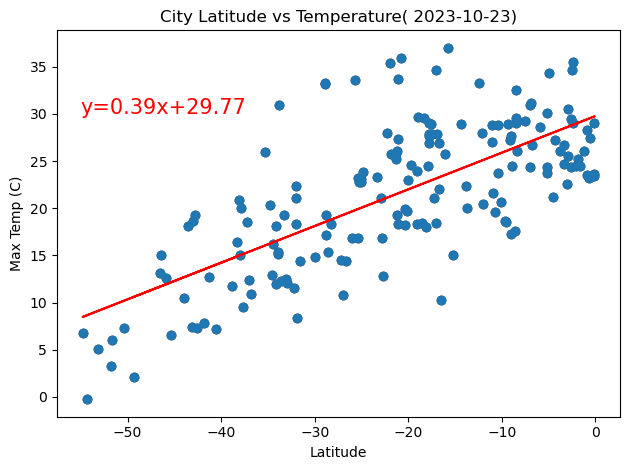

In [113]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],edgecolors='black',color='blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("City Latitude vs Temperature( 2023-10-23)")
plt.tight_layout() 
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],(-55,30))

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.16250934842358558


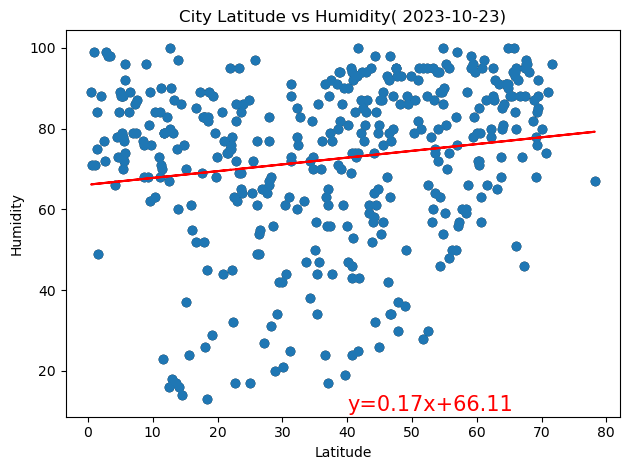

In [114]:
# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],edgecolors='black',color='blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity( 2023-10-23)")
plt.tight_layout() 
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],(40,10))

# Show plot
plt.show()

The r-value is: -0.020549056050793428


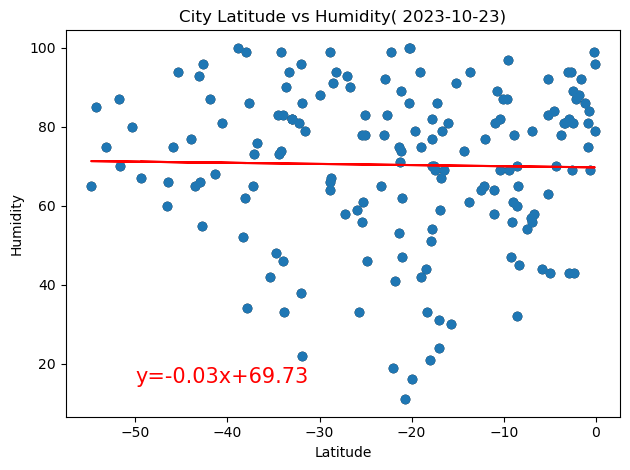

In [115]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],edgecolors='black',color='blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity( 2023-10-23)")
plt.tight_layout() 
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],(-50,15))

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07391529451943953


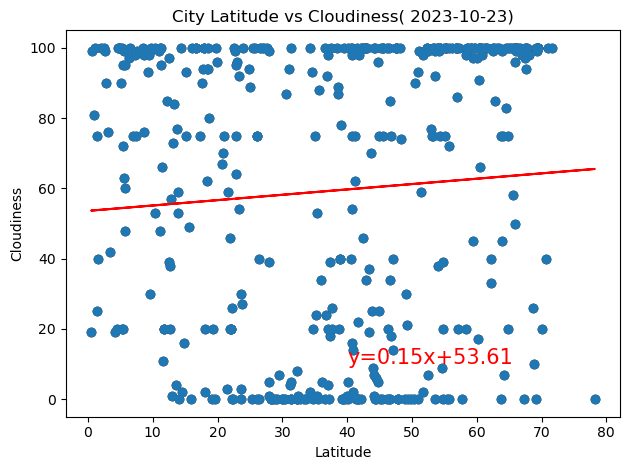

In [116]:
# Northern Hemisphere
# Build scatter plot for latitude vs. Cloudiness
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],edgecolors='black',color='blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness( 2023-10-23)")
plt.tight_layout() 
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],(40,10))

# Show plot
plt.show()

The r-value is: 0.14680016557521466


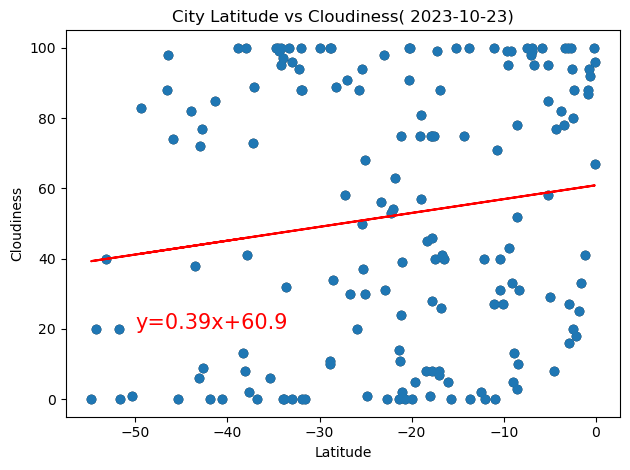

In [117]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. Cloudiness
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],edgecolors='black',color='blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness( 2023-10-23)")
plt.tight_layout() 
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],(-50,20))

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.22645042240005625


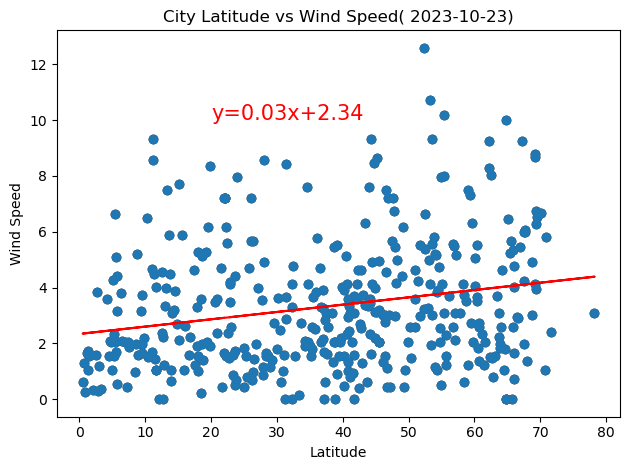

In [118]:
# Northern Hemisphere
# Build scatter plot for latitude vs. Wind Speed
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],edgecolors='black',color='blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed( 2023-10-23)")
plt.tight_layout() 
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],(20,10))

# Show plot
plt.show()

The r-value is: -0.1115898878863383


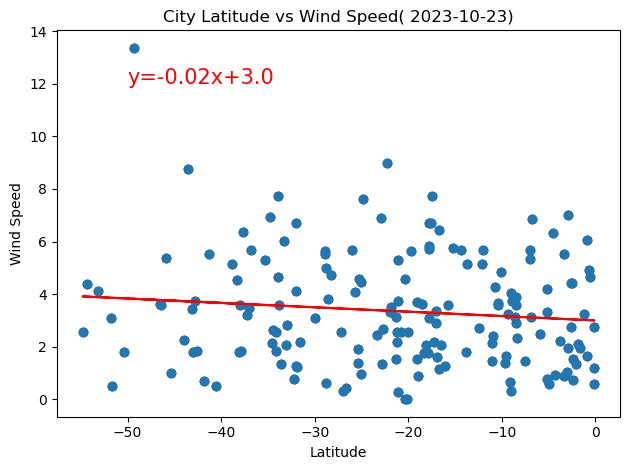

In [119]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. Cloudiness
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],edgecolors='black',color='blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed( 2023-10-23)")
plt.tight_layout() 
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],(-50,12))

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE